# Finding the Best Markets to Advertise In

## The Purpose of the Project and the Dataset
In this project, we want to find two best markets, countries for advertising e-learning programming courses as an e-learning company mainly producing courses on web and mobile development.

We use the results of survey taken by freeCodeCamp and the dataset of the results could be accessed in its [GitHub](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Checking the Data and the Columns

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
raw_survey = pd.read_csv('raw-data/2017-new-coder-survey-part-1.csv')
print(survey.shape)
print(survey.columns)
survey.head()

(18175, 136)
Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
for i, r in enumerate(survey.columns):
    print(i, r)

0 Age
1 AttendedBootcamp
2 BootcampFinish
3 BootcampLoanYesNo
4 BootcampName
5 BootcampRecommend
6 ChildrenNumber
7 CityPopulation
8 CodeEventConferences
9 CodeEventDjangoGirls
10 CodeEventFCC
11 CodeEventGameJam
12 CodeEventGirlDev
13 CodeEventHackathons
14 CodeEventMeetup
15 CodeEventNodeSchool
16 CodeEventNone
17 CodeEventOther
18 CodeEventRailsBridge
19 CodeEventRailsGirls
20 CodeEventStartUpWknd
21 CodeEventWkdBootcamps
22 CodeEventWomenCode
23 CodeEventWorkshops
24 CommuteTime
25 CountryCitizen
26 CountryLive
27 EmploymentField
28 EmploymentFieldOther
29 EmploymentStatus
30 EmploymentStatusOther
31 ExpectedEarning
32 FinanciallySupporting
33 FirstDevJob
34 Gender
35 GenderOther
36 HasChildren
37 HasDebt
38 HasFinancialDependents
39 HasHighSpdInternet
40 HasHomeMortgage
41 HasServedInMilitary
42 HasStudentDebt
43 HomeMortgageOwe
44 HoursLearning
45 ID.x
46 ID.y
47 Income
48 IsEthnicMinority
49 IsReceiveDisabilitiesBenefits
50 IsSoftwareDev
51 IsUnderEmployed
52 JobApplyWhen
53 Job

In [3]:
for i, r in enumerate(raw_survey.columns):
    print(i, r)

0 #
1 Are you already working as a software developer?
2 Is this your first software development job?
3 Before you got this job, how many months did you spend looking for a job?
4 Would you prefer to...
5 Full-Stack Web Developer
6 Back-End Web Developer
7   Front-End Web Developer
8   Mobile Developer
9   DevOps / SysAdmin
10   Data Scientist
11   Quality Assurance Engineer
12   User Experience Designer
13   Product Manager
14 Game Developer
15 Information Security
16 Data Engineer
17 Other
18 When do you plan to start applying for developer jobs?
19 About how much money do you expect to earn per year at your first developer job (in US Dollars)?
20 Would you prefer to work...
21 Are you willing to relocate for a job?
22 freeCodeCamp
23 EdX
24 Coursera
25 Khan Academy
26 Pluralsight / Code School
27 Codecademy
28 Udacity
29 Udemy
30 Code Wars
31 The Odin Project
32 Treehouse
33 Lynda.com
34 Stack Overflow
35 W3Schools
36 Skillcrush
37 HackerRank
38 Mozilla Developer Network (MDN)
39 Eg

According to the datasets `survey` and `raw_survey`, we now realze what kind of questions were made in the survey. Our goal is to find markets to advertise in, so the columns of the job interest of people and the column of their living country s
eem to be useful.

### Job Interest Column

In [4]:
interest_col = []
for col in survey.columns:
    if 'Interest' in col:
        print(col)
        interest_col.append(col)

JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec
JobInterestMobile
JobInterestOther
JobInterestProjMngr
JobInterestQAEngr
JobInterestUX
JobRoleInterest


In [5]:
survey[interest_col].head(5)

,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRoleInterest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full-Stack Web Developer
2,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"Front-End Web Developer, Back-End Web Develo..."
3,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Front-End Web Developer, Full-Stack Web Deve..."
4,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,"Full-Stack Web Developer, Information Security..."


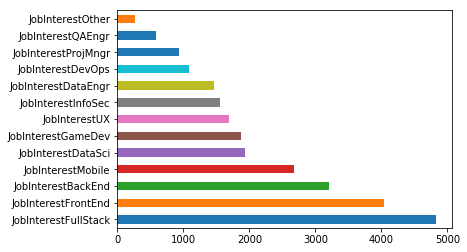

In [6]:
interest_s = pd.Series(index=interest_col)
for col in interest_col:
    num_interests = survey[col].notnull().sum()
    interest_s[col] = num_interests
    
interest_s = interest_s.sort_values(ascending=False)[1:]
interest_s.plot.barh()

In [7]:
survey['JobRoleInterest'].value_counts(normalize=True, dropna=False)

NaN                                                                                                                                                                                                                                                         0.615296
Full-Stack Web Developer                                                                                                                                                                                                                                    0.045282
  Front-End Web Developer                                                                                                                                                                                                                                   0.024759
  Data Scientist                                                                                                                                                                                                         

According to the `JobRoleInterest`, there are so many people who are not intrested in any jobs and it is more than 60%. However, we are only interested in people who are finding jobs, so we leave them out.

In [8]:
job_interest = survey[survey['JobRoleInterest'].notnull()].copy()
job_interest.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Living Country Column

In [9]:
for col in job_interest.columns:
    if 'Country' in col:
        print(col)

CountryCitizen
CountryLive


The column of `CountryCitizen` means counries where people were born and the column of `CountryLive` means countries where people are living now.
Since we are interested in countries where people are living now, we use `CountryLive` column.

In [10]:
country_num = job_interest['CountryLive'].value_counts()
country_num.head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

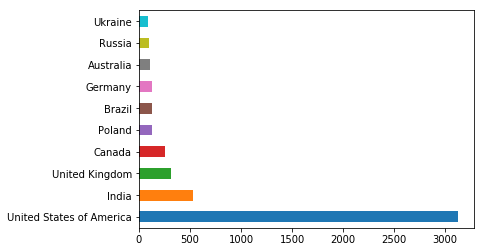

In [11]:
country_pct = job_interest['CountryLive'].value_counts(normalize=True)
country_pct.head(10)

country_num.head(10).plot.barh()

This frequency bar plot above shows the top 10 countries with many people who in terested in jobs.

As an e-learning company the absolute number of people who interested in jobs are very important, so from now on, we will analyze on the only top 4 countries, 'United States of America', 'India', 'United Kingdom', and 'Canada'.

In [12]:
top_4 = ['United States of America', 'India', 'United Kingdom', 'Canada']
top_countries = job_interest[job_interest['CountryLive'].apply(lambda x: x in top_4)].copy()
top_countries['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

#### Japanese Rank
This is not relevant to this project, but I'm interested in Japanese rank in the world.

The results are below:

In [13]:
for i, c in enumerate(country_num.index):
    if c=='Japan':
        print('{} is ranked {} and only {} people in Japan are looking for new IT engineering jobs in the survey.'.format(c, i+1, country_num[i]))

Japan is ranked 43 and only 24 people in Japan are looking for new IT engineering jobs in the survey.


## How Much Money People Spend for Learning
To know how much money people spend for learning, we use two columns of `MoneyForLearning` and `MonthsProgramming`. 

`MoneyForLearning` shows the total money they spent for learning since they started to learn coding and `MonthsProgramming` shows how many months did it take since they started to learn coding.

Therefore, we will get to know how much money people spend for learning for a month by calculating `MoneyForLearning` devided by `MonthsProgramming` and assigning it to `MoneyPerMonth`.

### Calculating `MoneyPerMonth`

In [14]:
top_countries[['MoneyForLearning', 'MonthsProgramming']].head()

,MoneyForLearning,MonthsProgramming
1,80.0,6.0
2,1000.0,5.0
6,0.0,12.0
13,NaN,NaN
14,NaN,9.0


In [15]:
survey['MonthsProgramming'].value_counts().sort_index().head()

0.0     578
1.0    1697
2.0    1338
3.0    1333
4.0     732
Name: MonthsProgramming, dtype: int64

Some people answed 0 months for the question `MonthsProgramming` and we have to devide `MoneyForLearning` by `MonthsProgramming`, so we will replace 0 by 1 in the column to calculate with no errors.

In [16]:
survey['MoneyPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming'].apply(lambda x: 1 if x==0 else x)
job_interest_with_money = survey[survey['JobRoleInterest'].notnull()]
job_interest_with_money.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [17]:
money_grouped_by_country = job_interest_with_money[['CountryLive', 'MoneyPerMonth']].groupby('CountryLive').agg({'MoneyPerMonth':['mean', 'count']})
money_grouped_by_country.sort_values(('MoneyPerMonth', 'mean'), ascending=False).head(10)

MoneyPerMonth      
                           mean count
CountryLive                          
Yemen              10000.000000     1
Puerto Rico         4291.394558     7
Austria              936.208333    16
Spain                784.553084    66
Jamaica              747.037037     9
Hong Kong            523.341049     9
Trinidad & Tobago    500.000000     1
Australia            419.268452   102
Taiwan               417.966524    12
Luxembourg           338.817664     6

Before comparing `MoneyPerMonth` between the top 4 countries, we checked the column for all the countries. These results look interesting and a few people in some developing countries spent so much money for learning. The person in Yemen who spent 10,000 dollars for learning is suprising!

### Comparing Top 4 Countries by `MoneyPerMonth`

In [18]:
money_top4 = job_interest_with_money[job_interest_with_money['CountryLive'].apply(lambda x: x in top_4)]
money_top4['MoneyPerMonth'].isnull().sum()

313

In [19]:
money_top4_paid = money_top4[money_top4['MoneyPerMonth'].notnull()].copy()
money_top4_grouped_by_country = money_top4_paid[['CountryLive', 'MoneyPerMonth']].groupby('CountryLive').agg({'MoneyPerMonth':['mean', 'count']})
money_top4_grouped_by_country.sort_values(('MoneyPerMonth', 'mean'), ascending=False)

MoneyPerMonth      
                                  mean count
CountryLive                                 
United States of America    227.997996  2933
India                       135.100982   463
Canada                      113.510961   240
United Kingdom               45.534443   279

From this results of 4 countries, we could couclude that people in the U.S. spent mush more money for learning than the other three countries and that people in the U.K. less likly to spend money for learning.

### Leaving Out Outliers
Although calculating the mean of `MoneyPerMonth`, the values might not be good enough to estimate which countries are the best as markets to advertise in because there might be some outliers of `MoneyPerMonth` and they might greatly affect the mean of it.

So, to reduce the effect of outliers, we will check box plot of the values and leave out some outliers, then recalcurate the mean of `MoneyPerMonth`.

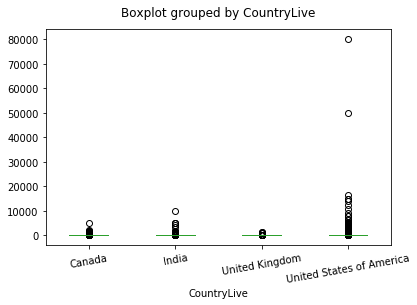

In [20]:
def show_boxplot(df, rot=0):
    df.boxplot(by='CountryLive', column='MoneyPerMonth', grid=False, rot=rot)
    plt.title('')

show_boxplot(money_top4_paid, rot=10)

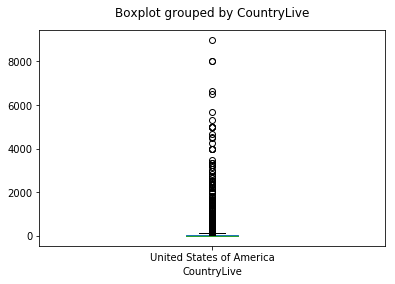

In [21]:
us = money_top4_paid[(money_top4_paid['CountryLive']=='United States of America') & (money_top4_paid['MoneyPerMonth']<10000)]
show_boxplot(us)

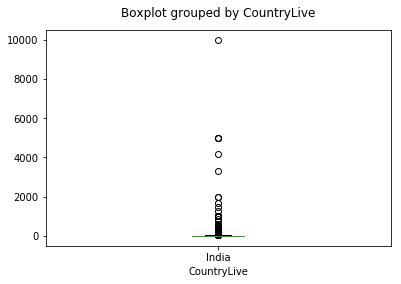

In [22]:
india = money_top4_paid[money_top4_paid['CountryLive']=='India']
show_boxplot(india)

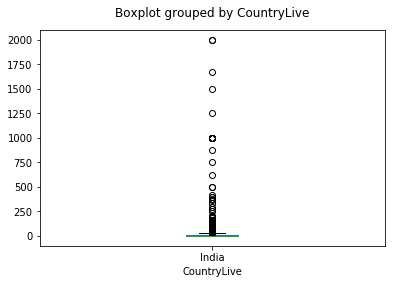

In [23]:
india = india[india['MoneyPerMonth']<3000]
show_boxplot(india)

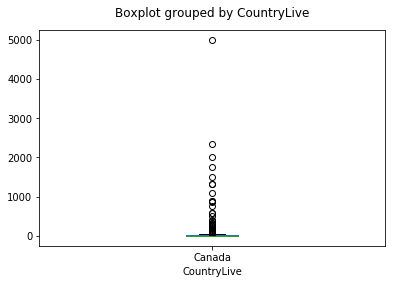

In [24]:
canada = money_top4_paid[money_top4_paid['CountryLive']=='Canada']
show_boxplot(canada)

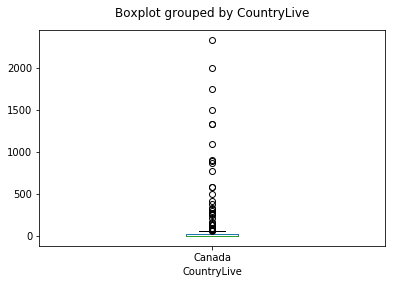

In [25]:
canada = canada[canada['MoneyPerMonth']<3000]
show_boxplot(canada)

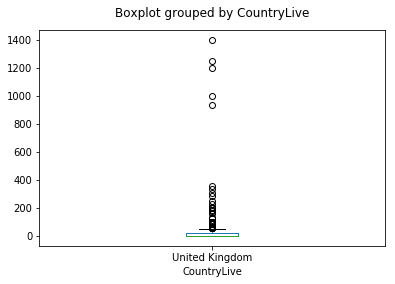

In [26]:
uk = money_top4_paid[money_top4_paid['CountryLive']=='United Kingdom']
show_boxplot(uk)

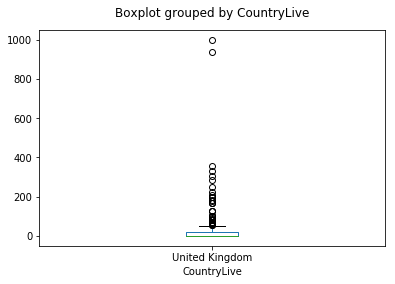

In [27]:
uk = uk[uk['MoneyPerMonth']<1100]
show_boxplot(uk)

In [28]:
top4_money_mean = pd.Series(index=['us', 'india', 'canada', 'uk'])
for i, c in enumerate([us, india, canada, uk]):
    top4_money_mean.iloc[i] = c['MoneyPerMonth'].mean()
top4_money_mean.sort_values(ascending=False)

us        155.459187
canada     93.065400
india      65.758763
uk         32.080107
dtype: float64

Finally, we could conclude that the best countries to advertise in are the United States of America!

Comparing the mean values above, Canada is better than India but India might be better to advertise in, so it seems to be a good choice to think about other criteria to compare these two countries.